<a href="https://colab.research.google.com/github/swayam-learning/DataScience_ML/blob/master/Project/Project_YellowTripTaxi/yellowtaxi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 30) ## sare column dekhne ke liye
pd.set_option('display.max_rows', 50) ##ab column dekh rahe hai toh row bhi dekhle yaar
pd.options.display.float_format = '{:.2f}'.format ## bhai pareshan ho gaya exponential se toh yahi tareeka hai


- **VendorID**  
  Code indicating the TPEP (Taxi Passenger Enhancement Program) provider that supplied the record.  
  - `1` = Creative Mobile Technologies, LLC  
  - `2` = VeriFone Inc.

- **tpep_pickup_datetime**  
  The date and time when the meter was engaged.

- **tpep_dropoff_datetime**  
  The date and time when the meter was disengaged.

- **Passenger_count**  
  The number of passengers in the vehicle.  
  _(Note: This value is entered manually by the driver.)_

- **Trip_distance**  
  The total trip distance in miles, as reported by the taximeter.

- **PULocationID**  
  TLC Taxi Zone ID where the meter was engaged.

- **DOLocationID**  
  TLC Taxi Zone ID where the meter was disengaged.

- **RateCodeID**  
  The final rate code applied at the end of the trip.
  - `1` = Standard rate  
  - `2` = JFK Airport  
  - `3` = Newark Airport  
  - `4` = Nassau or Westchester  
  - `5` = Negotiated fare  
  - `6` = Group ride  

- **Store_and_fwd_flag**  
  Indicates if the trip record was held in vehicle memory before being sent to the server.
  - `Y` = Store and forward trip  
  - `N` = Not a store and forward trip  

- **Payment_type**  
  Numeric code representing how the passenger paid for the trip.
  - `1` = Credit card  
  - `2` = Cash  
  - `3` = No charge  
  - `4` = Dispute  
  - `5` = Unknown  
  - `6` = Voided trip  

- **Fare_amount**  
  The base fare calculated based on time and distance by the meter.

- **Extra**  
  Additional surcharges, such as rush hour and overnight charges ($0.50 and $1, respectively).

- **MTA_tax**  
  A $0.50 tax automatically triggered based on the metered rate.

- **Improvement_surcharge**  
  A $0.30 surcharge levied at the start of each trip, starting in 2015.

- **Tip_amount**  
  Tips recorded automatically for credit card transactions. _(Cash tips are not included.)_

- **Tolls_amount**  
  The total amount of tolls paid during the trip.

- **Total_amount**  
  The total fare charged to passengers, excluding cash tips.

- **Congestion_Surcharge**  
  The total amount collected for the NYS congestion surcharge during the trip.

# **Cleaning**

In [19]:
df = pd.read_csv('https://query.data.world/s/sojjjcx7g7ll2cixc7ir2yvgvrrfh6?dws=00000')

In [20]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.00,2020-01-01 00:28:15,2020-01-01 00:33:03,1.00,1.20,1.00,N,238,239,1.00,6.00,3.00,0.50,1.47,0.00,0.30,11.27,2.50
1,1.00,2020-01-01 00:35:39,2020-01-01 00:43:04,1.00,1.20,1.00,N,239,238,1.00,7.00,3.00,0.50,1.50,0.00,0.30,12.30,2.50
2,1.00,2020-01-01 00:47:41,2020-01-01 00:53:52,1.00,0.60,1.00,N,238,238,1.00,6.00,3.00,0.50,1.00,0.00,0.30,10.80,2.50
3,1.00,2020-01-01 00:55:23,2020-01-01 01:00:14,1.00,0.80,1.00,N,238,151,1.00,5.50,0.50,0.50,1.36,0.00,0.30,8.16,0.00
4,2.00,2020-01-01 00:01:58,2020-01-01 00:04:16,1.00,0.00,1.00,N,193,193,2.00,3.50,0.50,0.50,0.00,0.00,0.30,4.80,0.00


In [21]:
df.info(memory_usage="deep",verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6405008 entries, 0 to 6405007
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               float64
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           float64
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
dtypes: float64(13), int64(2), object(3)
memory usage: 2.0 GB


## **Finding the percentage of null values**

In [22]:
df.isnull().sum()/df.shape[0]*100

,0
VendorID,1.02
tpep_pickup_datetime,0.00
tpep_dropoff_datetime,0.00
passenger_count,1.02
trip_distance,0.00
RatecodeID,1.02
store_and_fwd_flag,1.02
PULocationID,0.00
DOLocationID,0.00
payment_type,1.02


### *as most of the columns have only 1% null values we can drop them as it won't effect the overall dataset*

In [23]:
df.dropna(inplace=True)

### *we have dropped the null values*

In [24]:
df.duplicated().sum()

0

## *no we do not have null values or duplicate values*

## *checking for the integrity of data in the numerical columns*

In [25]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.00,2020-01-01 00:28:15,2020-01-01 00:33:03,1.00,1.20,1.00,N,238,239,1.00,6.00,3.00,0.50,1.47,0.00,0.30,11.27,2.50
1,1.00,2020-01-01 00:35:39,2020-01-01 00:43:04,1.00,1.20,1.00,N,239,238,1.00,7.00,3.00,0.50,1.50,0.00,0.30,12.30,2.50
2,1.00,2020-01-01 00:47:41,2020-01-01 00:53:52,1.00,0.60,1.00,N,238,238,1.00,6.00,3.00,0.50,1.00,0.00,0.30,10.80,2.50
3,1.00,2020-01-01 00:55:23,2020-01-01 01:00:14,1.00,0.80,1.00,N,238,151,1.00,5.50,0.50,0.50,1.36,0.00,0.30,8.16,0.00
4,2.00,2020-01-01 00:01:58,2020-01-01 00:04:16,1.00,0.00,1.00,N,193,193,2.00,3.50,0.50,0.50,0.00,0.00,0.30,4.80,0.00


In [26]:
df[df["fare_amount"]<0].sort_values("total_amount")

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
471400,2.00,2020-01-03 19:29:51,2020-01-05 12:28:15,1.00,8.27,1.00,N,186,152,3.00,-1238.00,-1.00,-0.50,0.00,0.00,-0.30,-1242.30,-2.50
3938141,2.00,2020-01-21 01:10:40,2020-01-21 01:10:49,4.00,0.00,5.00,N,42,42,4.00,-730.00,0.00,0.00,0.00,0.00,-0.30,-730.30,0.00
1024291,2.00,2020-01-06 22:23:17,2020-01-06 22:23:30,1.00,0.00,5.00,N,65,65,2.00,-500.00,0.00,0.00,0.00,0.00,-0.30,-500.30,0.00
2724419,2.00,2020-01-15 05:00:34,2020-01-15 05:04:39,1.00,0.00,5.00,N,133,133,3.00,-400.00,0.00,0.00,0.00,0.00,-0.30,-400.30,0.00
5227053,2.00,2020-01-26 21:47:20,2020-01-26 21:48:25,1.00,0.02,5.00,N,186,186,3.00,-330.00,0.00,-0.50,0.00,0.00,-0.30,-333.30,-2.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5187669,2.00,2020-01-26 17:30:27,2020-01-26 17:30:55,1.00,0.00,5.00,N,193,193,3.00,-0.05,0.00,0.00,0.00,0.00,-0.30,-0.35,0.00
5052402,2.00,2020-01-26 00:08:11,2020-01-26 00:08:15,1.00,0.00,5.00,N,264,264,3.00,-0.02,0.00,0.00,0.00,0.00,-0.30,-0.32,0.00
260630,2.00,2020-01-02 16:34:56,2020-01-02 16:35:02,1.00,0.00,5.00,N,135,135,3.00,-0.01,0.00,0.00,0.00,0.00,-0.30,-0.31,0.00
348971,1.00,2020-01-03 07:49:34,2020-01-03 07:54:34,1.00,0.00,1.00,N,75,75,1.00,-0.80,0.00,0.50,0.00,0.00,0.30,0.00,0.00


### *the amount paid can never be negative i am going to change it to positive and then find out if there is any anomaly*

In [27]:
for col in list(df.select_dtypes(include="number").columns):
    df[col] = df[col].apply(lambda x: abs(x))

### *Cross validating if the loop worked*

In [28]:
df[df["fare_amount"]<0].sort_values("total_amount")

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge


### *Making the columns have correct datatypes*


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6339567 entries, 0 to 6339566
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               float64
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           float64
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
dtypes: float64(13), int64(2), object(3)
memory usage: 919.0+ MB


In [30]:
df["tpep_dropoff_datetime"] = df["tpep_dropoff_datetime"].astype("datetime64[ns]")
df["tpep_pickup_datetime"] = df["tpep_pickup_datetime"].astype("datetime64[ns]")

In [31]:
df["payment_type"].value_counts()

,count
payment_type,
1.00,4694897
2.00,1593834
3.00,32770
4.00,18065
5.00,1


### *we see that the payment type has only 5 modes of payment we can convert this to int*

In [32]:
df["payment_type"] = df["payment_type"].astype("int")

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6339567 entries, 0 to 6339566
Data columns (total 18 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               float64       
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
dtypes: datetime64[ns](2), float

In [34]:
df["tpep_pickup_datetime"].value_counts()

,count
tpep_pickup_datetime,
2020-01-16 18:53:03,16
2020-01-28 18:18:25,16
2020-01-14 18:42:52,15
2020-01-14 07:53:28,15
2020-01-13 22:17:54,15
...,...
2020-01-05 21:22:06,1
2020-01-19 01:01:22,1
2020-01-11 08:17:43,1


In [35]:
df['VendorID'] = df['VendorID'].astype('category')
df['RatecodeID'] = df['RatecodeID'].astype('category')
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].astype('category')
df['PULocationID'] = df['PULocationID'].astype('category')
df['DOLocationID'] = df['DOLocationID'].astype('category')
df["passenger_count"] = df["passenger_count"].astype("int")

In [36]:
df.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
Index: 6339567 entries, 0 to 6339566
Data columns (total 18 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               category      
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        int64         
 4   trip_distance          float64       
 5   RatecodeID             category      
 6   store_and_fwd_flag     category      
 7   PULocationID           category      
 8   DOLocationID           category      
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
dtypes: category(5), datetime64[

### *the memory usage dropped from 2.0 gb to 885.9 MB*


### *want to work only on dates in the month of january*

In [37]:
df = df[(df["tpep_dropoff_datetime"]>"2020-01-01 00:00:00") & (df["tpep_dropoff_datetime"]<"2020-01-31 23:59:59")]

In [38]:
df.tpep_pickup_datetime.describe()

,tpep_pickup_datetime
count,6336742
mean,2020-01-17 03:52:53.983592448
min,2019-12-31 14:15:51
25%,2020-01-09 17:38:49
50%,2020-01-17 00:07:36
75%,2020-01-24 18:32:48
max,2020-01-31 23:59:07


In [39]:
df.describe()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,6336742,6336742,6336742.00,6336742.00,6336742.00,6336742.00,6336742.00,6336742.00,6336742.00,6336742.00,6336742.00,6336742.00,6336742.00
mean,2020-01-17 03:52:53.983592448,2020-01-17 04:08:38.059139840,1.52,2.85,1.27,12.57,1.10,0.50,2.21,0.34,0.30,18.56,2.31
min,2019-12-31 14:15:51,2020-01-01 00:00:47,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2020-01-09 17:38:49,2020-01-09 17:54:52,1.00,0.96,1.00,6.50,0.00,0.50,0.00,0.00,0.30,11.16,2.50
50%,2020-01-17 00:07:36,2020-01-17 00:24:00,1.00,1.60,1.00,9.00,0.50,0.50,1.95,0.00,0.30,14.16,2.50
75%,2020-01-24 18:32:48,2020-01-24 18:48:31,2.00,2.90,2.00,13.50,2.50,0.50,2.86,0.00,0.30,19.56,2.50
max,2020-01-31 23:59:07,2020-01-31 23:59:58,9.00,262.88,5.00,4265.00,113.01,30.80,1100.00,910.50,0.30,4268.30,2.75
std,NaN,NaN,1.15,3.76,0.47,11.87,1.25,0.04,2.76,1.75,0.01,14.52,0.66


In [70]:
df["date"] = df["tpep_pickup_datetime"].dt.date
df["day"] = df["tpep_pickup_datetime"].dt.day
df["month"] = df["tpep_pickup_datetime"].dt.month
df["year"] = df["tpep_pickup_datetime"].dt.year
df['hr'] = df['tpep_pickup_datetime'].dt.hour
df['weekday'] = df['tpep_pickup_datetime'].dt.weekday

In [41]:
df["duration_of_trip"] = df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"]

In [42]:
df['duration_of_trip'] = df['duration_of_trip'] / np.timedelta64(1, 'm')
## this helps in converting them into proper minutes for example we have 00:30:00 now after divding it to timedelta64(1,"m") it will be converted to 30.0 as in minutes

In [43]:
df["duration_of_trip"].describe()

,duration_of_trip
count,6336742.00
mean,15.73
std,62.53
min,-2770.37
25%,6.33
50%,10.40
75%,16.65
max,8525.12


### *we have negative values that means pickup time is greater than drop off time which is not possible*

In [44]:
df[df["duration_of_trip"]<0].sort_values(by="duration_of_trip")

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,date,day,month,year,duration_of_trip
540040,1.00,2020-01-04 08:19:55,2020-01-02 10:09:33,1,3.50,1.00,N,107,237,1,16.50,2.50,0.50,4.95,0.00,0.30,24.75,2.50,2020-01-04,4,1,2020,-2770.37


#### *dropping the negative duration*

In [45]:
df = df[df["duration_of_trip"]>0]

In [46]:
df.duration_of_trip.describe()

,duration_of_trip
count,6332595.00
mean,15.75
std,62.54
min,0.02
25%,6.35
50%,10.40
75%,16.65
max,8525.12


### *we have no negative duration*

In [47]:
df.duration_of_trip.max()

8525.116666666667

#### *we have a trip which took 8525 minutes and no negative or zeros in the duration now trying to find duration for trips greater than 3hrs*

In [48]:
df[df["duration_of_trip"]>180].sort_values(by="duration_of_trip",ascending=False)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,date,day,month,year,duration_of_trip
4049543,2.00,2020-01-21 15:38:33,2020-01-27 13:43:40,1,1.57,1.00,N,186,152,2,4265.00,0.00,0.50,0.00,0.00,0.30,4268.30,2.50,2020-01-21,21,1,2020,8525.12
4704348,2.00,2020-01-24 14:19:18,2020-01-28 10:49:13,1,0.01,1.00,N,207,146,2,7.50,0.80,0.50,0.00,0.00,0.00,8.80,0.00,2020-01-24,24,1,2020,5549.92
944735,2.00,2020-01-06 15:39:47,2020-01-09 13:07:47,1,0.00,99.00,N,264,193,2,2.50,0.80,0.50,0.00,0.00,0.00,3.80,0.00,2020-01-06,6,1,2020,4168.00
2290066,2.00,2020-01-12 23:04:21,2020-01-15 15:05:15,1,0.17,1.00,N,101,19,2,2.50,0.00,0.50,0.00,0.00,0.30,3.30,0.00,2020-01-12,12,1,2020,3840.90
5059294,2.00,2020-01-26 00:51:39,2020-01-28 07:18:59,1,58.85,1.00,N,132,7,2,1718.50,0.50,0.50,0.00,0.00,0.30,1722.30,2.50,2020-01-26,26,1,2020,3267.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4172994,2.00,2020-01-22 05:30:33,2020-01-22 08:32:19,1,1.93,1.00,N,138,230,2,11.00,0.00,0.50,0.00,0.00,0.30,14.30,2.50,2020-01-22,22,1,2020,181.77
4102671,2.00,2020-01-21 16:12:43,2020-01-21 19:14:24,2,0.00,5.00,N,132,264,1,65.00,0.00,0.50,0.00,0.00,0.00,65.50,0.00,2020-01-21,21,1,2020,181.68
87903,1.00,2020-01-01 12:43:45,2020-01-01 15:45:06,3,12.80,1.00,N,48,48,2,102.50,2.50,0.50,0.00,0.00,0.30,105.80,2.50,2020-01-01,1,1,2020,181.35
5928819,2.00,2020-01-30 11:47:02,2020-01-30 14:47:55,1,0.00,99.00,N,207,146,2,2.50,0.80,0.50,0.00,0.00,0.00,3.80,0.00,2020-01-30,30,1,2020,180.88


#### *we have 13372 entries which are greater than 3hrs*


#### *we try to fix the duartion of trip to less than 3 or 3.5 hrs , because there is no way that 5539minutes trip would lead to a total amount of 8.8 dollars so there is a fault in taximeter*

In [49]:
df = df[df["duration_of_trip"]<200]

In [50]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,date,day,month,year,duration_of_trip
0,1.00,2020-01-01 00:28:15,2020-01-01 00:33:03,1,1.20,1.00,N,238,239,1,6.00,3.00,0.50,1.47,0.00,0.30,11.27,2.50,2020-01-01,1,1,2020,4.80
1,1.00,2020-01-01 00:35:39,2020-01-01 00:43:04,1,1.20,1.00,N,239,238,1,7.00,3.00,0.50,1.50,0.00,0.30,12.30,2.50,2020-01-01,1,1,2020,7.42
2,1.00,2020-01-01 00:47:41,2020-01-01 00:53:52,1,0.60,1.00,N,238,238,1,6.00,3.00,0.50,1.00,0.00,0.30,10.80,2.50,2020-01-01,1,1,2020,6.18
3,1.00,2020-01-01 00:55:23,2020-01-01 01:00:14,1,0.80,1.00,N,238,151,1,5.50,0.50,0.50,1.36,0.00,0.30,8.16,0.00,2020-01-01,1,1,2020,4.85
4,2.00,2020-01-01 00:01:58,2020-01-01 00:04:16,1,0.00,1.00,N,193,193,2,3.50,0.50,0.50,0.00,0.00,0.30,4.80,0.00,2020-01-01,1,1,2020,2.30


In [51]:
df["passenger_count"].value_counts()

,count
passenger_count,
1,4533475
2,943518
3,249276
5,224504
6,131450
4,122995
0,114006
7,29
9,19


#### *i guess 0 pasengers means when the driver went alone to any distance or there was manual entry by the driver any case we will try to fill the value with median value*

In [52]:
passenger_median_count = df[df["passenger_count"]!=0]["passenger_count"].median()

In [53]:
df["passenger_count"] = df["passenger_count"].apply(lambda x:passenger_median_count if x==0 else x)

In [54]:
df["passenger_count"].value_counts()

,count
passenger_count,
1.00,4647481
2.00,943518
3.00,249276
5.00,224504
6.00,131450
4.00,122995
7.00,29
9.00,19
8.00,17


In [55]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,date,day,month,year,duration_of_trip
0,1.00,2020-01-01 00:28:15,2020-01-01 00:33:03,1.00,1.20,1.00,N,238,239,1,6.00,3.00,0.50,1.47,0.00,0.30,11.27,2.50,2020-01-01,1,1,2020,4.80
1,1.00,2020-01-01 00:35:39,2020-01-01 00:43:04,1.00,1.20,1.00,N,239,238,1,7.00,3.00,0.50,1.50,0.00,0.30,12.30,2.50,2020-01-01,1,1,2020,7.42
2,1.00,2020-01-01 00:47:41,2020-01-01 00:53:52,1.00,0.60,1.00,N,238,238,1,6.00,3.00,0.50,1.00,0.00,0.30,10.80,2.50,2020-01-01,1,1,2020,6.18
3,1.00,2020-01-01 00:55:23,2020-01-01 01:00:14,1.00,0.80,1.00,N,238,151,1,5.50,0.50,0.50,1.36,0.00,0.30,8.16,0.00,2020-01-01,1,1,2020,4.85
4,2.00,2020-01-01 00:01:58,2020-01-01 00:04:16,1.00,0.00,1.00,N,193,193,2,3.50,0.50,0.50,0.00,0.00,0.30,4.80,0.00,2020-01-01,1,1,2020,2.30


#### *now focusing on trip distance*

In [56]:
df["trip_distance"].describe()

,trip_distance
count,6319289.00
mean,2.85
std,3.75
min,0.00
25%,0.96
50%,1.60
75%,2.90
max,211.70


#### *ab dekho aise hi ki minnimum distance is somewhere 0 which is kind of confusing lets look into it*

In [57]:
df[df["trip_distance"]==0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,date,day,month,year,duration_of_trip
4,2.00,2020-01-01 00:01:58,2020-01-01 00:04:16,1.00,0.00,1.00,N,193,193,2,3.50,0.50,0.50,0.00,0.00,0.30,4.80,0.00,2020-01-01,1,1,2020,2.30
6,2.00,2020-01-01 00:39:25,2020-01-01 00:39:29,1.00,0.00,1.00,N,193,193,1,2.50,0.50,0.50,0.01,0.00,0.30,3.81,0.00,2020-01-01,1,1,2020,0.07
19,1.00,2020-01-01 00:25:39,2020-01-01 00:27:05,1.00,0.00,1.00,N,170,162,4,3.00,3.00,0.50,0.00,0.00,0.30,6.80,2.50,2020-01-01,1,1,2020,1.43
473,1.00,2020-01-01 00:31:06,2020-01-01 01:04:57,1.00,0.00,1.00,N,166,211,1,26.20,0.00,0.50,0.00,0.00,0.30,27.00,0.00,2020-01-01,1,1,2020,33.85
646,1.00,2020-01-01 00:44:35,2020-01-01 01:16:02,1.00,0.00,1.00,N,17,108,1,39.20,0.00,0.50,0.00,0.00,0.30,40.00,0.00,2020-01-01,1,1,2020,31.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6339382,2.00,2020-01-31 23:04:47,2020-01-31 23:04:57,4.00,0.00,5.00,N,229,229,1,60.00,0.00,0.50,12.66,0.00,0.30,75.96,2.50,2020-01-31,31,1,2020,0.17
6339401,2.00,2020-01-31 23:17:48,2020-01-31 23:17:51,5.00,0.00,5.00,N,263,264,1,65.00,0.00,0.50,13.16,0.00,0.30,78.96,0.00,2020-01-31,31,1,2020,0.05
6339436,1.00,2020-01-31 23:51:05,2020-01-31 23:51:08,1.00,0.00,1.00,N,132,132,3,2.50,0.50,0.50,0.00,0.00,0.30,3.80,0.00,2020-01-31,31,1,2020,0.05
6339508,1.00,2020-01-31 23:14:54,2020-01-31 23:15:57,1.00,0.00,1.00,N,132,132,3,2.50,0.50,0.50,0.00,0.00,0.30,3.80,0.00,2020-01-31,31,1,2020,1.05


#### *the trip distance zero is an error i am going to drop it*

In [58]:
df= df[df["trip_distance"]>0]

In [59]:
df["fare_amount"].describe()

,fare_amount
count,6255907.00
mean,12.38
std,11.10
min,0.00
25%,6.50
50%,9.00
75%,13.50
max,575.00


#### *we see paymnet amount to be zero which is not possible and is definitely a mistake , now according to the nyc taxi prices* 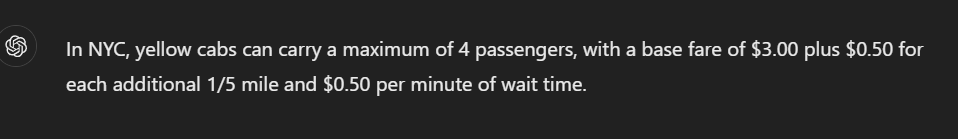

In [61]:
df = df[df["fare_amount"]>3] # we have fixed the fare_amount at atleast fairvalue of 3$

#### *now we focus on extras column that focuses on the extar charges paid by the user on rush hours or overnight*

In [62]:
df["extra"].describe()

,extra
count,6217995.00
mean,1.11
std,1.25
min,0.00
25%,0.00
50%,0.50
75%,2.50
max,113.01


#### *i want to have only the values with extra less than or equal to 10$*

In [63]:
df = df[df["extra"]<10]

In [64]:
df.describe()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,day,month,year,duration_of_trip
count,6217987,6217987,6217987.00,6217987.00,6217987.00,6217987.00,6217987.00,6217987.00,6217987.00,6217987.00,6217987.00,6217987.00,6217987.00,6217987.00,6217987.00,6217987.00,6217987.00
mean,2020-01-17 04:00:21.994011904,2020-01-17 04:13:26.540897024,1.54,2.89,1.26,12.44,1.11,0.50,2.21,0.33,0.30,18.46,2.33,16.57,1.00,2020.00,13.08
min,2019-12-31 23:30:07,2020-01-01 00:00:55,1.00,0.01,1.00,3.50,0.00,0.00,0.00,0.00,0.00,1.60,0.00,1.00,1.00,2019.00,0.02
25%,2020-01-09 17:42:06,2020-01-09 17:56:27,1.00,1.00,1.00,6.50,0.00,0.50,0.00,0.00,0.30,11.16,2.50,9.00,1.00,2020.00,6.47
50%,2020-01-17 00:15:27,2020-01-17 00:28:02,1.00,1.60,1.00,9.00,0.50,0.50,1.96,0.00,0.30,14.30,2.50,17.00,1.00,2020.00,10.48
75%,2020-01-24 18:37:47,2020-01-24 18:51:40.500000,2.00,2.90,2.00,13.50,2.50,0.50,2.86,0.00,0.30,19.56,2.50,24.00,1.00,2020.00,16.65
max,2020-01-31 23:58:25,2020-01-31 23:59:58,9.00,211.70,4.00,575.00,9.50,6.80,1100.00,910.50,0.30,1110.80,2.75,31.00,12.00,2020.00,199.82
std,NaN,NaN,1.14,3.76,0.46,11.11,1.25,0.03,2.68,1.73,0.00,13.82,0.63,8.83,0.03,0.00,9.78


In [66]:
new_df = df.shape[0]

In [67]:
old_df_shape = 6405008

In [68]:
(old_df_shape-new_df)/old_df_shape

0.029199182889389053

#### *we lost only 2% of the data and also reduced from 2Gb to 829MB*

# **Visualisation**

####Q1. *Average Rides Per Hour*


In [71]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,date,day,month,year,duration_of_trip,hr,weekday
0,1.00,2020-01-01 00:28:15,2020-01-01 00:33:03,1.00,1.20,1.00,N,238,239,1,6.00,3.00,0.50,1.47,0.00,0.30,11.27,2.50,2020-01-01,1,1,2020,4.80,0,2
1,1.00,2020-01-01 00:35:39,2020-01-01 00:43:04,1.00,1.20,1.00,N,239,238,1,7.00,3.00,0.50,1.50,0.00,0.30,12.30,2.50,2020-01-01,1,1,2020,7.42,0,2
2,1.00,2020-01-01 00:47:41,2020-01-01 00:53:52,1.00,0.60,1.00,N,238,238,1,6.00,3.00,0.50,1.00,0.00,0.30,10.80,2.50,2020-01-01,1,1,2020,6.18,0,2
3,1.00,2020-01-01 00:55:23,2020-01-01 01:00:14,1.00,0.80,1.00,N,238,151,1,5.50,0.50,0.50,1.36,0.00,0.30,8.16,0.00,2020-01-01,1,1,2020,4.85,0,2
9,1.00,2020-01-01 00:29:01,2020-01-01 00:40:28,2.00,0.70,1.00,N,246,48,1,8.00,3.00,0.50,2.35,0.00,0.30,14.15,2.50,2020-01-01,1,1,2020,11.45,0,2


In [96]:
Vendor_per_hour = df.groupby(["hr","date"])["VendorID"].count()
total_rides = Vendor_per_hour.rename("No_Of_rides").reset_index()
hr_avg_rides_df = total_rides.groupby(["hr"])["No_Of_rides"].mean()

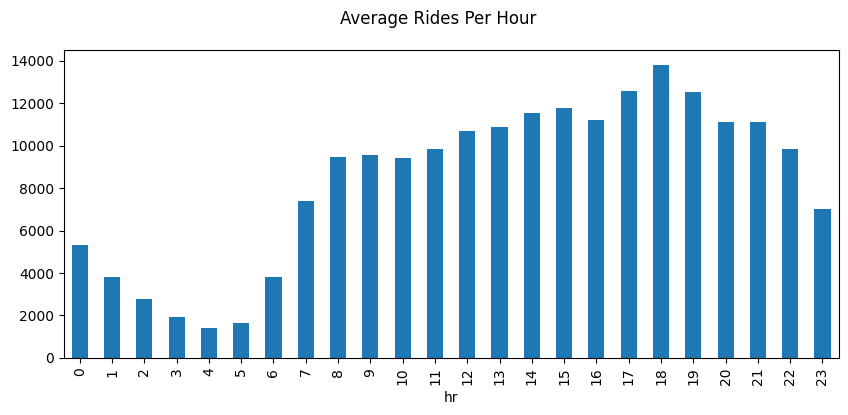

In [115]:
plt.figure(figsize=(10,4))
hr_avg_rides_df.plot(kind="bar")
plt.suptitle("Average Rides Per Hour")
plt.show()

### *we can see subah ke 4 baje kam hi logo ki chul hai jane ki and sham ke 6 baje toh bhai bohoton ko jana hai🤣*

#### Q2. *Average rides per day*

In [114]:
Vendor_per_day = df.groupby(["day","date"])["VendorID"].count()
total_rides = Vendor_per_day.rename("No_Of_rides").reset_index()
day_avg_rides_df = total_rides.groupby(["day"])["No_Of_rides"].mean()
# day_avg_rides_df

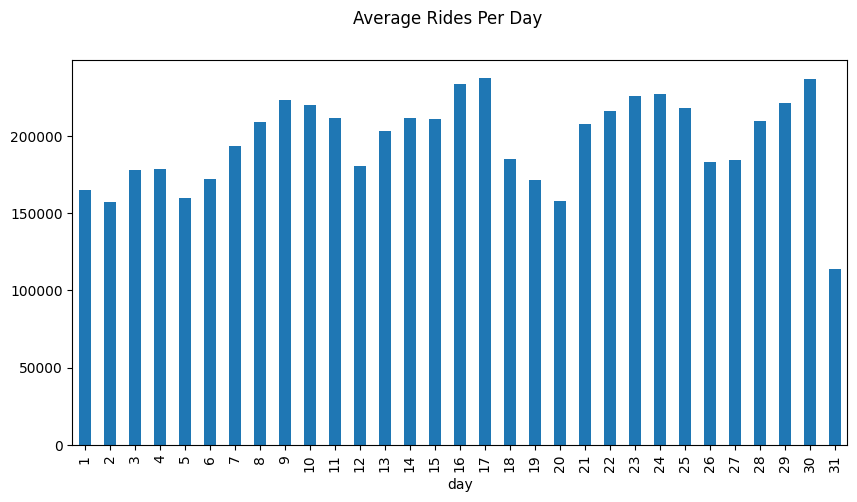

In [116]:
plt.figure(figsize=(10,5))
day_avg_rides_df.plot(kind="bar")
plt.suptitle("Average Rides Per Day")
plt.show()

In [132]:
rides = df.pivot_table(index="date",columns="hr",values="VendorID",aggfunc="count")
rides

hr,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
date,,,,,,,,,,,,,,,,,,,,,,,,
2019-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.00
2020-01-01,12923.00,14658.00,13132.00,9474.00,5975.00,2613.00,2126.00,2257.00,2218.00,3111.00,4424.00,6146.00,7869.00,8478.00,8303.00,8422.00,8191.00,8196.00,8130.00,7223.00,6062.00,5901.00,5168.00,3818.00
2020-01-02,2231.00,1173.00,741.00,542.00,681.00,1432.00,3441.00,5613.00,7265.00,7809.00,7996.00,8485.00,9705.00,9741.00,10352.00,10608.00,9921.00,10626.00,11002.00,9530.00,8158.00,8222.00,6889.00,4909.00
2020-01-03,3298.00,2108.00,1222.00,936.00,898.00,1418.00,3701.00,6074.00,8468.00,9211.00,8712.00,8756.00,9744.00,9834.00,10562.00,10366.00,10194.00,11242.00,11899.00,11711.00,9390.00,10308.00,10017.00,8117.00
2020-01-04,6501.00,5218.00,3749.00,2745.00,1558.00,1095.00,1611.00,2730.00,3998.00,6251.00,7708.00,8749.00,9613.00,10059.00,9491.00,10381.00,10551.00,10904.00,10981.00,11313.00,10038.00,11718.00,11015.00,10458.00
2020-01-05,8211.00,6670.00,5358.00,3615.00,2201.00,1119.00,1510.00,2204.00,3779.00,5874.00,8142.00,9054.00,10195.00,10239.00,10281.00,10309.00,10663.00,10421.00,9608.00,8197.00,7204.00,6350.00,4737.00,3755.00
2020-01-06,2147.00,1091.00,778.00,488.00,784.00,1842.00,4670.00,9163.00,11176.00,10119.00,8726.00,8511.00,9002.00,9161.00,10126.00,10537.00,10165.00,11531.00,12520.00,11124.00,9729.00,8500.00,5918.00,4183.00
2020-01-07,2529.00,1331.00,822.00,558.00,781.00,1790.00,4560.00,9344.00,11521.00,10510.00,9531.00,9216.00,9861.00,10333.00,11286.00,11760.00,10678.00,12643.00,14790.00,12912.00,11704.00,11094.00,8562.00,5259.00
2020-01-08,3101.00,1660.00,1061.00,694.00,781.00,1656.00,4754.00,9672.00,11922.00,11251.00,9762.00,9918.00,10786.00,10729.00,11696.00,12383.00,11391.00,13667.00,15366.00,14162.00,12847.00,13047.00,9916.00,6660.00


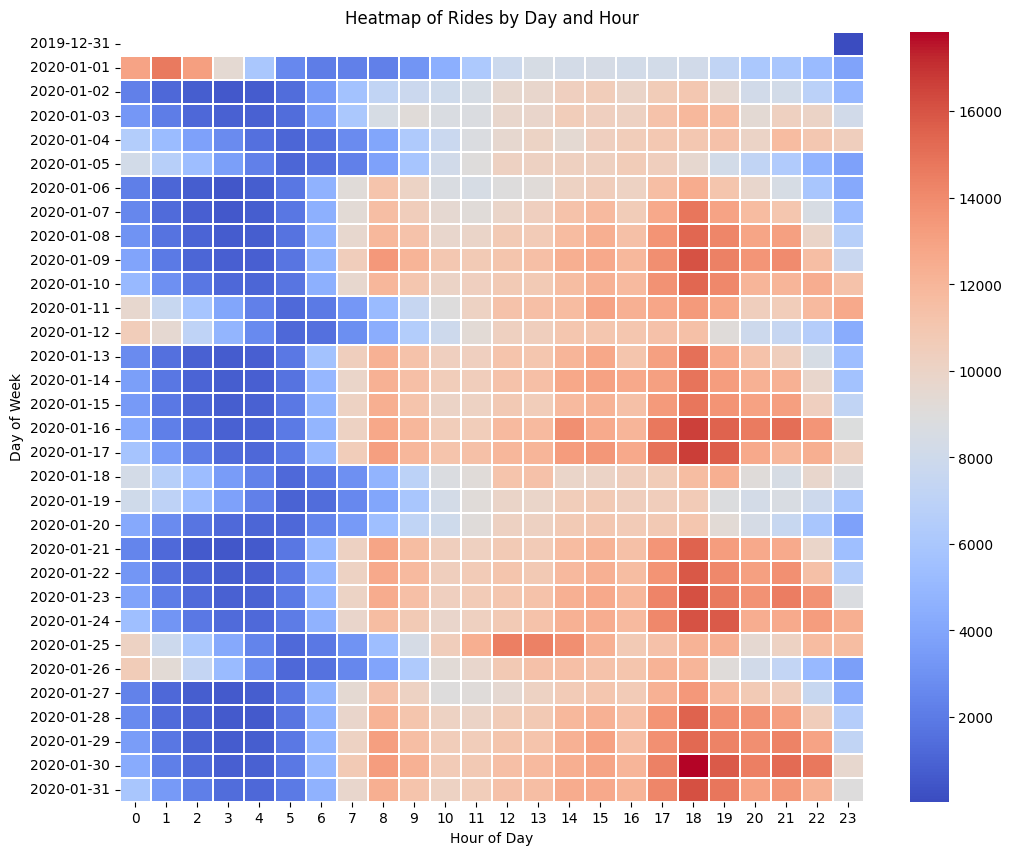

In [134]:
plt.figure(figsize=(12, 10))
sns.heatmap(rides, annot=False, fmt=".1%", cmap="coolwarm",linewidths=0.2)
plt.title("Heatmap of Rides by Day and Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()

#### *Everyday between 4pm to 8pm there are a lot of rides and speicifcally at 6pm there is surge in no of rides,also on 30january 2020 there is maximum no of rides happening on further checking on chatgpt i found it was the day there was the first case of covid virus reported this may have been a reason for the increased demand of the yellow taxis, it may have been a coincidence as well*
